In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [126]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [127]:
data.shape

(158, 12)

<b>It has 158 rows & 12 columns.</b>

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


<b>The columns has not any null values. in which
 Country & Region are object type,
    
Happiness rank is of int type &
    
all other variables are of float type.</b>

In [129]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

The following columns:
Econumy(GDP per Capita), Family, Health(Life Expectancy), Freedom, Generosity, Trust(Government Corruption) describe the extent to which these factors contribute in evaluating the Happiness Score in each Country & Region.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

In [130]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

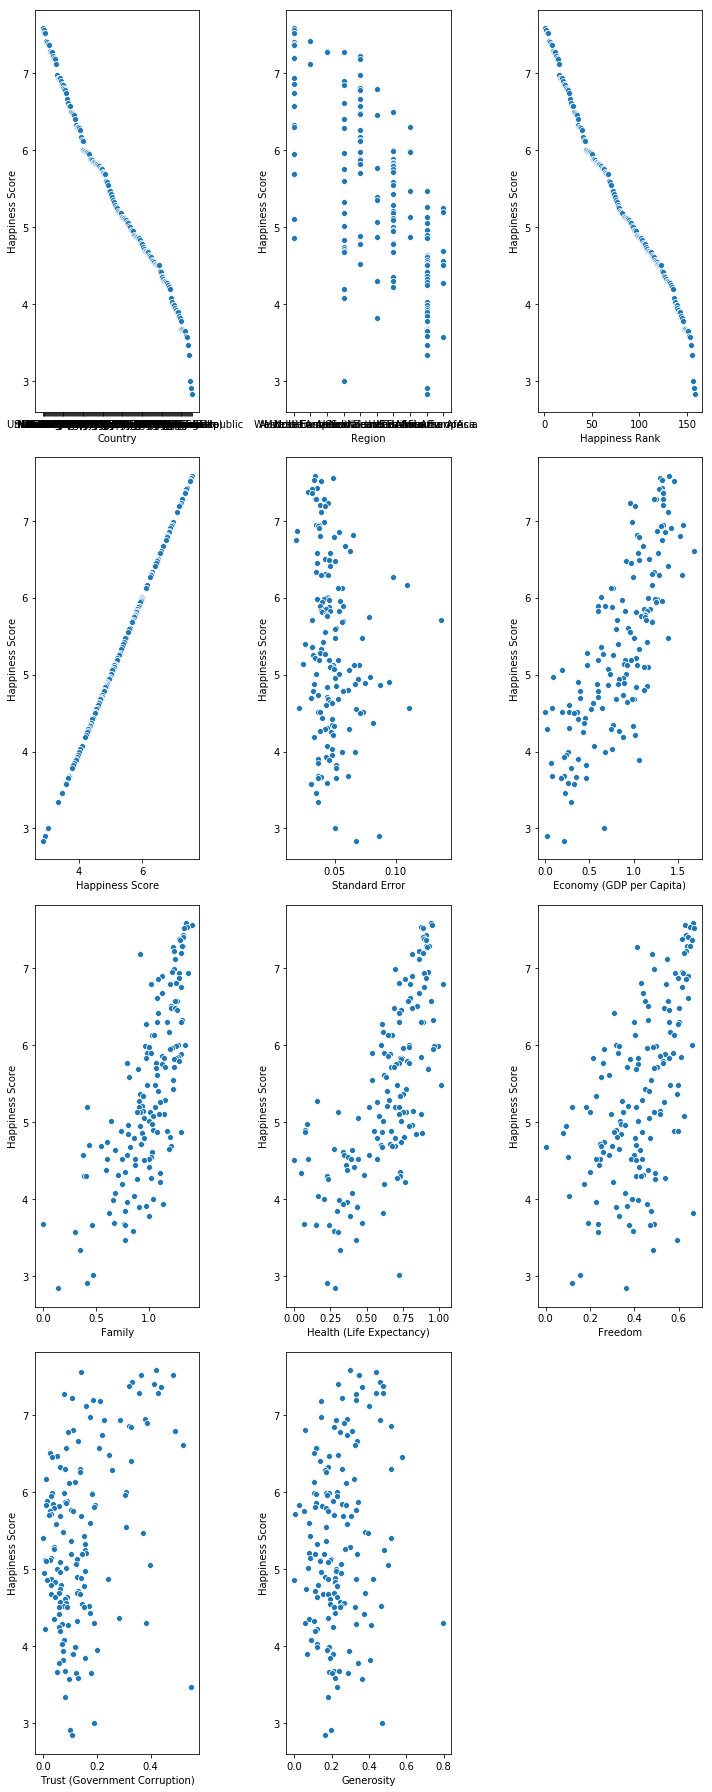

In [131]:
plt.figure(figsize=(10,25),facecolor='w')
graph=1
for col in data:
    if graph<12:
        ax=plt.subplot(4,3,graph)
        sns.scatterplot(x=col,y="Happiness Score",data=data)
        plt.xlabel(col)
        plt.ylabel("Happiness Score")
    graph+=1
plt.tight_layout()

1. Lowest the Standard Error,Generosity of the Country's Region higher the Happiness Score.
2. Higher the Economy higher the the Happiness Score.
3. The Country haves the more Family its Happiness Score is high.
4. The more you healthy, freedom,trust your Happiness Score is high
5. As we can see the Country,Region & Happiness Rank are based on the Happiness Score. So, we can remove these columns. 

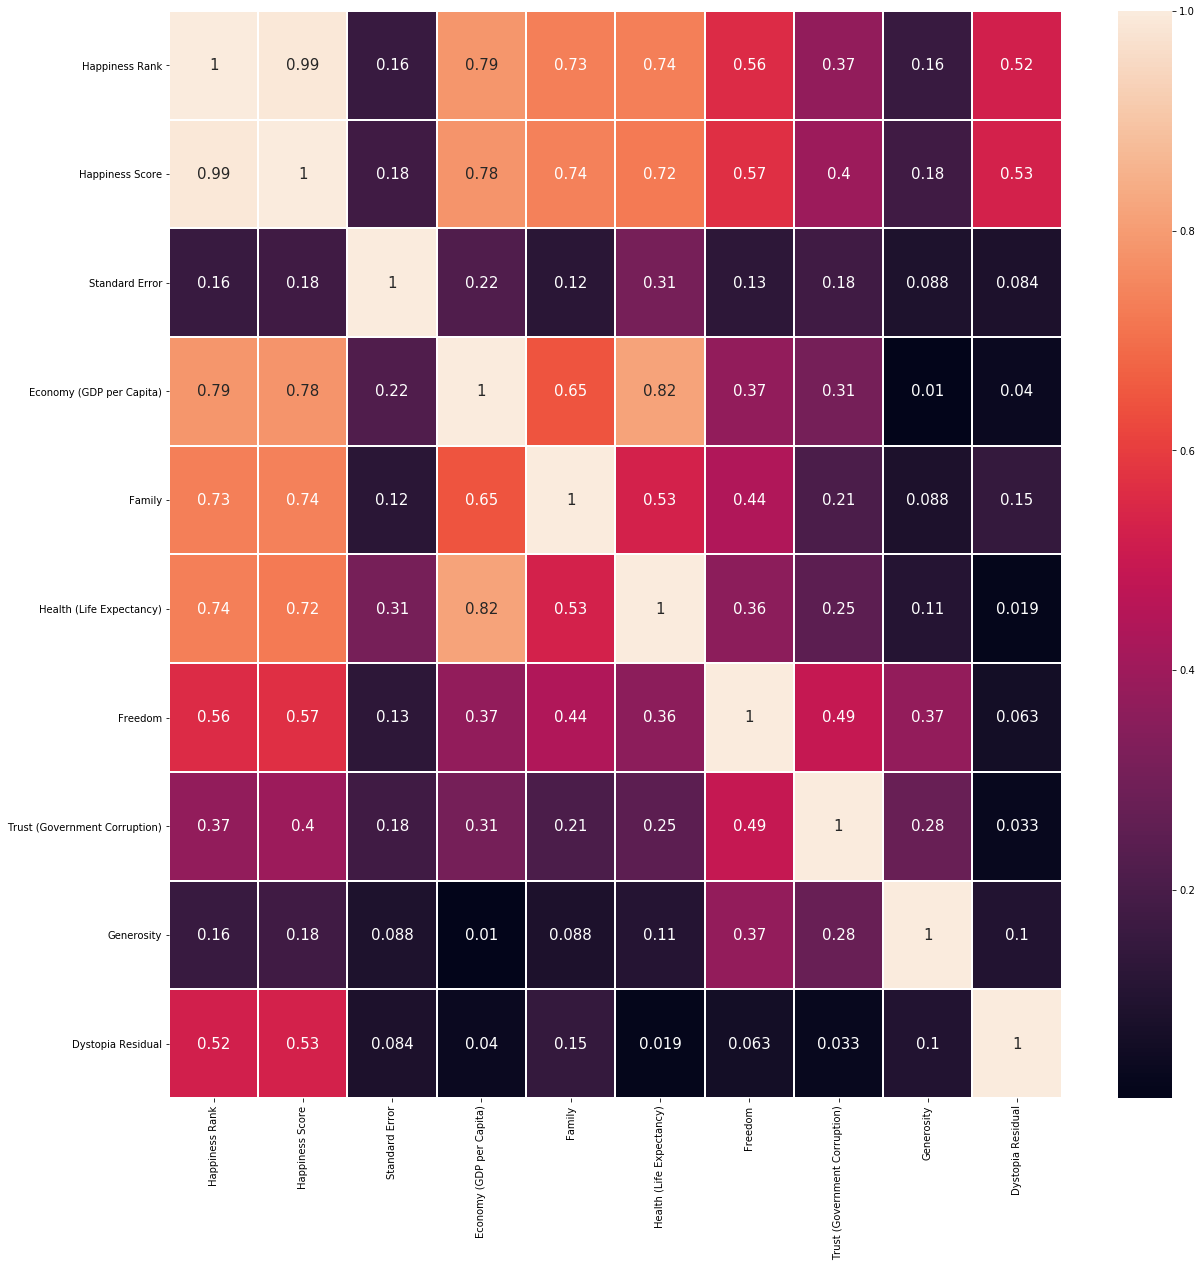

In [132]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)

only the Standard Error & Generosity has the lowest(16%) correlation with the Happiness Score.

In [133]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


in the columns Economy(GDP per Capita), Family, Health(Life Expectancy), Trust(Government Corruption), Generosity has min value 0 that is not valid. we should replace them by their respective mean.

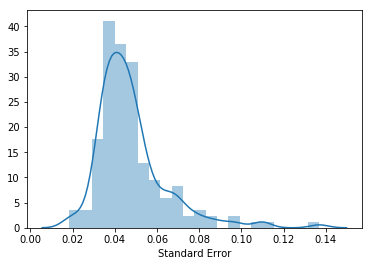

In [134]:
sns.distplot(data['Standard Error'])

it is not normally distributed.

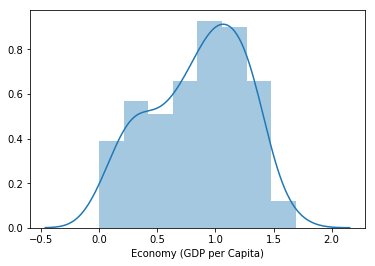

In [135]:
sns.distplot(data["Economy (GDP per Capita)"])

normally distributed

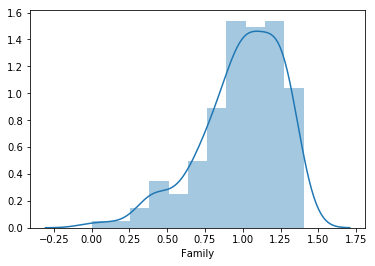

In [136]:
sns.distplot(data["Family"])

it is not normally distributed & has outliers too.

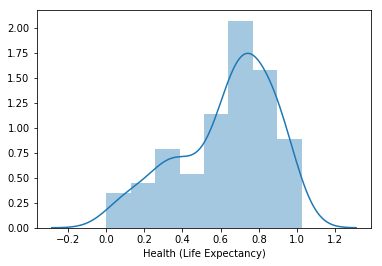

In [137]:
sns.distplot(data["Health (Life Expectancy)"])

it is not normally distributed

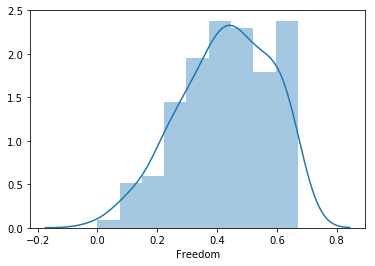

In [138]:
sns.distplot(data["Freedom"])

it is not normally distributed

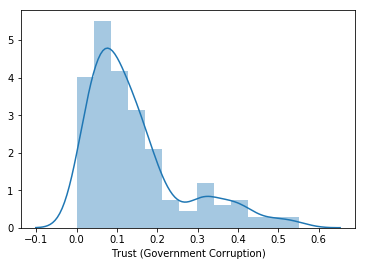

In [139]:
sns.distplot(data["Trust (Government Corruption)"])

it is not normally distributed

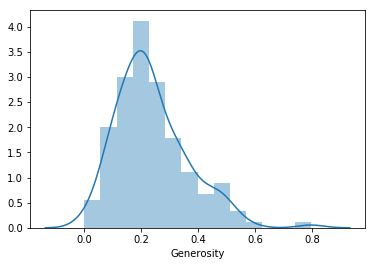

In [140]:
sns.distplot(data["Generosity"])

it is not normally distributed

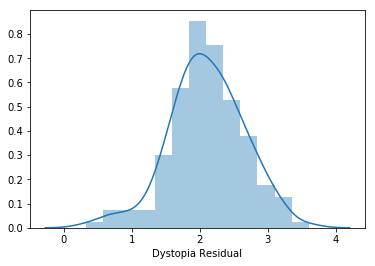

In [141]:
sns.distplot(data["Dystopia Residual"])

Normally Distributed

In [142]:
data.drop(['Country',"Region","Happiness Rank"],axis=1,inplace=True)

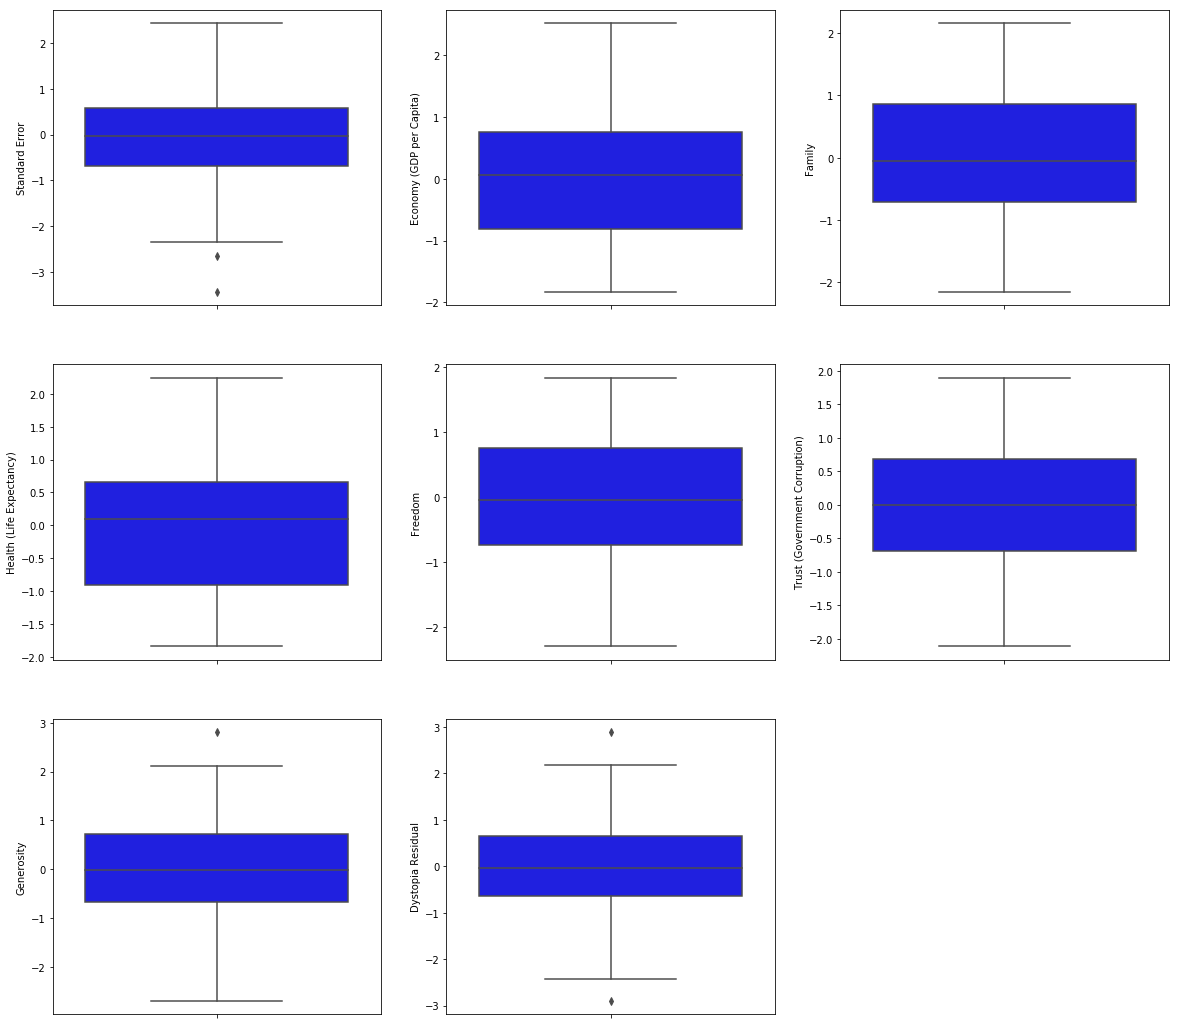

In [143]:
plotn=1
plt.figure(figsize=(20,25))
for col in X:
    if plot<12:
        ax=plt.subplot(4,3,plotn)
        sns.boxplot(X[col],color='blue',orient='v')
    plotn+=1
plt.show()

## Data Cleaning

### Remove Outliers

In [144]:
from scipy.stats import zscore
zs=zscore(data[["Standard Error","Family","Trust (Government Corruption)","Generosity","Dystopia Residual"]])
filtered=(np.abs(zs)<3).all(axis=1)
data=data[filtered]

In [145]:
data.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.429611,0.046241,0.862163,1.008623,0.638624,0.427449,0.140405,0.231500,2.120862
std,1.111256,0.014043,0.387975,0.251890,0.245937,0.150864,0.113385,0.119897,0.525654
min,2.905000,0.018480,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,4.610000,0.036800,0.593250,0.885880,0.467210,0.328180,0.061460,0.142720,1.792930
50%,5.268000,0.043610,0.920490,1.035160,0.703800,0.434500,0.107130,0.213330,2.100170
75%,6.295000,0.050690,1.159910,1.223930,0.814440,0.546040,0.175210,0.300300,2.465310
max,7.587000,0.098110,1.563910,1.402230,1.025250,0.669730,0.492100,0.576300,3.602140


After Removing Outliers the values of columns are used has been changed now.

Transforming data to less skewed or more data is more distributed

In [146]:
data.columns.values

array(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype=object)

In [147]:
features=['Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

In [148]:
from sklearn.preprocessing import PowerTransformer
scalar=PowerTransformer(method='yeo-johnson')
data[features]=scalar.fit_transform(data[features].values)
data[features]

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168
2,-1.041401,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495
3,-0.471124,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082
4,-0.799032,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030
5,-1.255101,1.156474,1.460509,1.140899,1.550773,1.802541,0.152497,0.952073
6,-1.670541,1.279070,1.227770,1.163679,1.334171,1.496752,1.777031,0.655832
7,-1.235344,1.286218,1.281273,1.275203,1.705223,1.861502,1.118193,0.474247
8,-0.993978,1.032727,1.469315,1.259599,1.531260,1.840294,1.771375,0.269153
9,-0.281116,1.292111,1.404443,1.406091,1.631893,1.636230,1.558794,0.273387


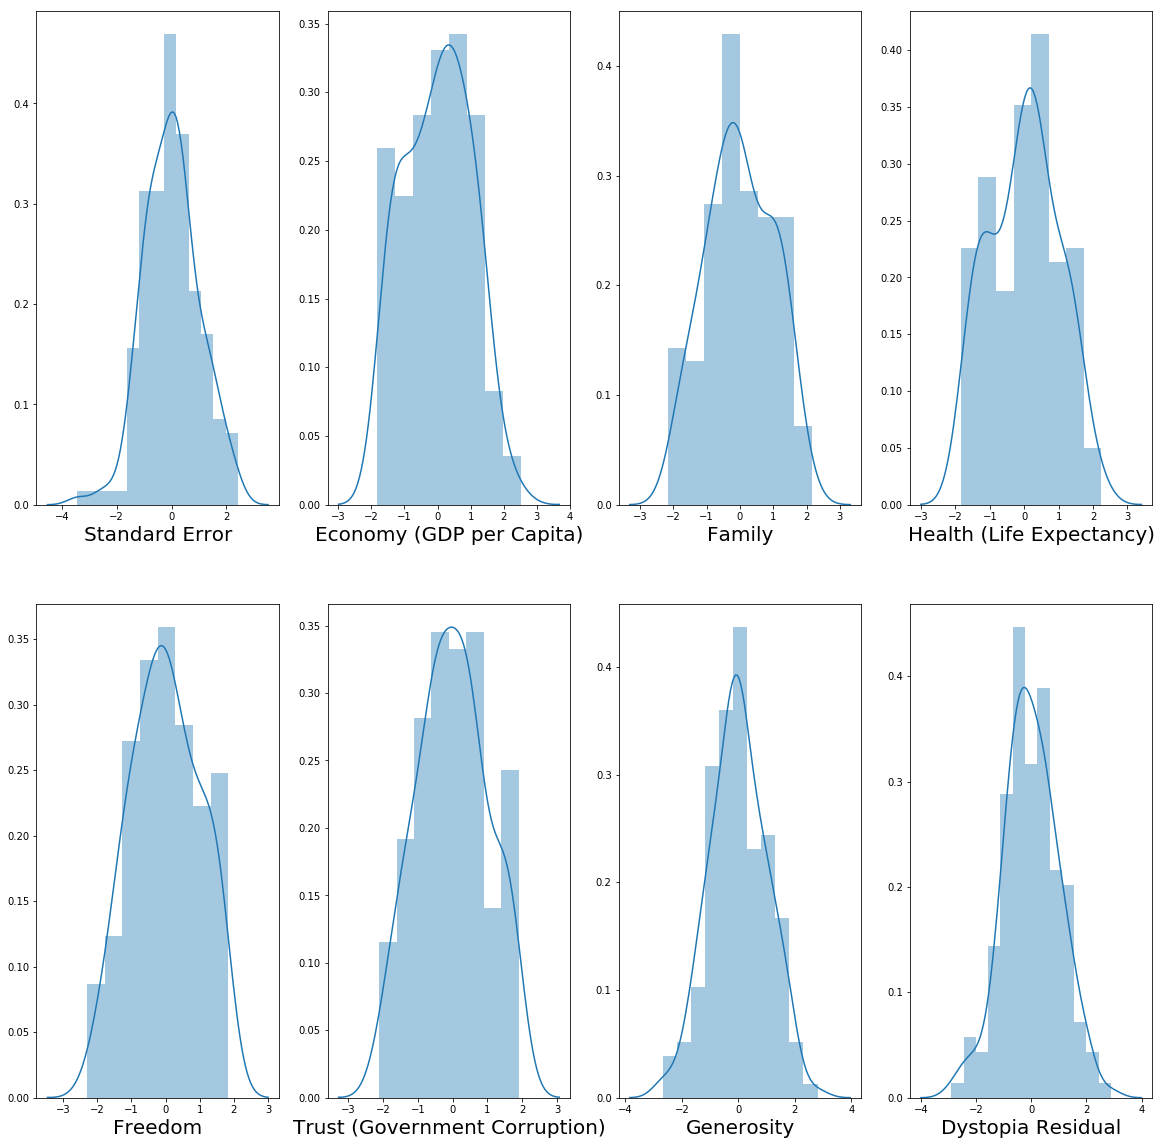

In [149]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in X:
    if plotno<=8:
        ax=plt.subplot(2,4,plotno)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

Here we can see that the data is less skewed or more distributed in comparision with the above distributed graph

### Splitting the data into  features & labels

In [150]:
X=data.drop(columns="Happiness Score",axis=1)
Y=data["Happiness Score"]

## Normalize the data

In [151]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [152]:
X_scaled

array([[-0.95033703,  1.49245411,  1.65888018, ...,  1.81762512,
         0.65957854,  0.75525527],
       [ 0.37856182,  1.19406711,  2.009125  , ...,  0.32967609,
         1.56260401,  1.11116834],
       [-1.04140135,  1.26661161,  1.73078531, ...,  1.95339954,
         0.97722591,  0.70649452],
       ...,
       [-1.32081011, -1.36521585, -2.08738872, ..., -0.19284338,
         1.13425805, -0.32711524],
       [-0.69272644, -1.43304072, -2.01044288, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [ 2.17876604, -1.93874732, -1.9064101 , ..., -0.14727362,
        -0.17248609, -0.55359235]])

### splitting features & labels into train & test dataset

In [153]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,Y,test_size=0.20,random_state=3445)

### Model Deployment

In [154]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(xtrain,ytrain)

predicted=lr.predict(xtest)

In [155]:
print("Accuracy of model",lr.score(xtest,predicted)*100)


Accuracy of model 100.0


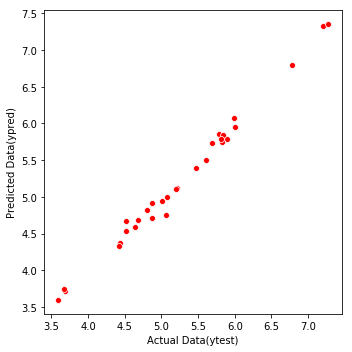

In [156]:
plt.figure(figsize=(5,5))
sns.scatterplot(ytest,predicted,color='r')
plt.xlabel("Actual Data(ytest)")
plt.ylabel('Predicted Data(ypred)')
plt.tight_layout()

In [157]:
#Comparision of Actual Test data & predicted data
df=pd.DataFrame({"Test Data":ytest,"Predicted":predicted})
df

,Test Data,Predicted
146,3.681,3.717283
51,5.889,5.784215
56,5.828,5.748152
90,5.057,4.754569
121,4.512,4.531858
12,7.200,7.324900
109,4.686,4.682025
10,7.278,7.357017
66,5.689,5.729585
79,5.212,5.114138


## Model Evaluation

In [158]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(predicted,ytest)
mae=mean_absolute_error(predicted,ytest)
rmse=np.sqrt(mean_squared_error(predicted,ytest))

print("-"*30,"\n Mean Absolute error: ",mae)
print("\n Mean Squared Error:",mse)
print("\n Root mean Squared Error:",rmse)

------------------------------ 
 Mean Absolute error:  0.07466552357464175

 Mean Squared Error: 0.009001845936858797

 Root mean Squared Error: 0.09487805824772552


## Saving the model

In [165]:
import pickle
pickle.dump(lr,open("Practice1_model.pickle","wb"))

### Regularization

In [159]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [166]:
#L1 Form
lasso=LassoCV(alphas=None,max_iter=1000,normalize=False)
lasso.fit(xtrain,ytrain)

LassoCV(normalize=False)

In [167]:
lasso_reg=Lasso(lasso.alpha_)
lasso_reg.fit(xtrain,ytrain)


Lasso(alpha=0.0009117448509752207)

In [168]:
lasso_reg.score(xtest,ytest)

0.989224571844669

## L2 Form

In [171]:
ridge=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=False)
ridge.fit(xtrain,ytrain)
ridge_reg=Ridge(alpha=ridge.alpha_)
ridge_reg.fit(xtrain,ytrain)

Ridge(alpha=0.09099999999999998)

In [172]:
ridge_reg.score(xtest,ytest)

0.9892185971267102

As L1 & L2 form of regularization gives the  accuracy of our model that is similiar with model deployment. So, there is no underfitting or overfitting.